# Анализ вакансий и резюме на сайте Head Hunter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
%matplotlib inline
import statistics

In [2]:
df = pd.read_excel("data_vacancies_cleaned.xlsx")
df.head()

,title,flag,experience,type_job,time_job,company_name,skills,date,where,salary_down,salary_up,salary_currency,type salary,vacansy_url,description
0,Аналитик (команда Поиска),data,1–3 года,Полная занятость,полный день,HeadHunter::Analytics/Data Science,"Анализ данных,Математическая статистика,SQL,Py...",2020-02-25,Москве,NaN,NaN,NaN,з/п не указана,https://hh.ru/vacancy/35121709,Ищем специалиста в команду Поиска: мы занимаем...
1,Data scientist/Портфельный аналитик,data,1–3 года,Полная занятость,полный день,"ООО, ,Поток.Диджитал","Python,Data Mining,SQL,Моделирование,Портфельн...",2020-02-28,Москве,130000.0,NaN,RUR,на руки,https://hh.ru/vacancy/35984434,NaN
2,Аналитик BI / Data scientist,data,1–3 года,Полная занятость,полный день,FBS Inc.,"SQL,Финансовое моделирование,Математическое мо...",2020-02-28,Санкт-Петербурге,NaN,NaN,NaN,з/п не указана,https://hh.ru/vacancy/33432328,", ,"
3,Artificial Intelligence and Data Analytics Sci...,data,3–6 лет,Полная занятость,полный день,Aramco Innovations,artificial intellegence,2020-02-29,Москве,NaN,NaN,NaN,з/п не указана,https://hh.ru/vacancy/35697650,Aramco Research Center – Moscow is offering gr...
4,Аналитик,data,1–3 года,Полная занятость,полный день,EASTEX,"VBA,MS Access,MS SQL Server,ABC-анализ,Статист...",2020-02-29,Москве,100000.0,NaN,RUR,на руки,https://hh.ru/vacancy/35855160,


In [3]:
df_data = df[df['flag']== 'data']
df_data.head()

,title,flag,experience,type_job,time_job,company_name,skills,date,where,salary_down,salary_up,salary_currency,type salary,vacansy_url,description
0,Аналитик (команда Поиска),data,1–3 года,Полная занятость,полный день,HeadHunter::Analytics/Data Science,"Анализ данных,Математическая статистика,SQL,Py...",2020-02-25,Москве,NaN,NaN,NaN,з/п не указана,https://hh.ru/vacancy/35121709,Ищем специалиста в команду Поиска: мы занимаем...
1,Data scientist/Портфельный аналитик,data,1–3 года,Полная занятость,полный день,"ООО, ,Поток.Диджитал","Python,Data Mining,SQL,Моделирование,Портфельн...",2020-02-28,Москве,130000.0,NaN,RUR,на руки,https://hh.ru/vacancy/35984434,NaN
2,Аналитик BI / Data scientist,data,1–3 года,Полная занятость,полный день,FBS Inc.,"SQL,Финансовое моделирование,Математическое мо...",2020-02-28,Санкт-Петербурге,NaN,NaN,NaN,з/п не указана,https://hh.ru/vacancy/33432328,", ,"
3,Artificial Intelligence and Data Analytics Sci...,data,3–6 лет,Полная занятость,полный день,Aramco Innovations,artificial intellegence,2020-02-29,Москве,NaN,NaN,NaN,з/п не указана,https://hh.ru/vacancy/35697650,Aramco Research Center – Moscow is offering gr...
4,Аналитик,data,1–3 года,Полная занятость,полный день,EASTEX,"VBA,MS Access,MS SQL Server,ABC-анализ,Статист...",2020-02-29,Москве,100000.0,NaN,RUR,на руки,https://hh.ru/vacancy/35855160,


In [4]:
df.describe()

,salary_down,salary_up
count,138097.000000,8.376500e+04
mean,48824.080190,7.382474e+04
std,33119.423597,7.943165e+04
min,35.000000,1.100000e+02
25%,30000.000000,3.745900e+04
50%,40000.000000,5.500000e+04
75%,60000.000000,9.000000e+04
max,1000000.000000,3.000000e+06


In [5]:
df_data.describe()

,salary_down,salary_up
count,1157.000000,728.000000
mean,72395.514261,95749.714286
std,48914.084551,72189.707372
min,200.000000,250.000000
25%,40000.000000,50000.000000
50%,60000.000000,80000.000000
75%,90000.000000,120000.000000
max,350000.000000,1000000.000000


In [6]:
df.dtypes

title                      object
flag                       object
experience                 object
type_job                   object
time_job                   object
company_name               object
skills                     object
date               datetime64[ns]
where                      object
salary_down               float64
salary_up                 float64
salary_currency            object
type salary                object
vacansy_url                object
description                object
dtype: object

## Строим графики

/home/igreevaveronika/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Распределение вакансий по дням(все вакансии)')

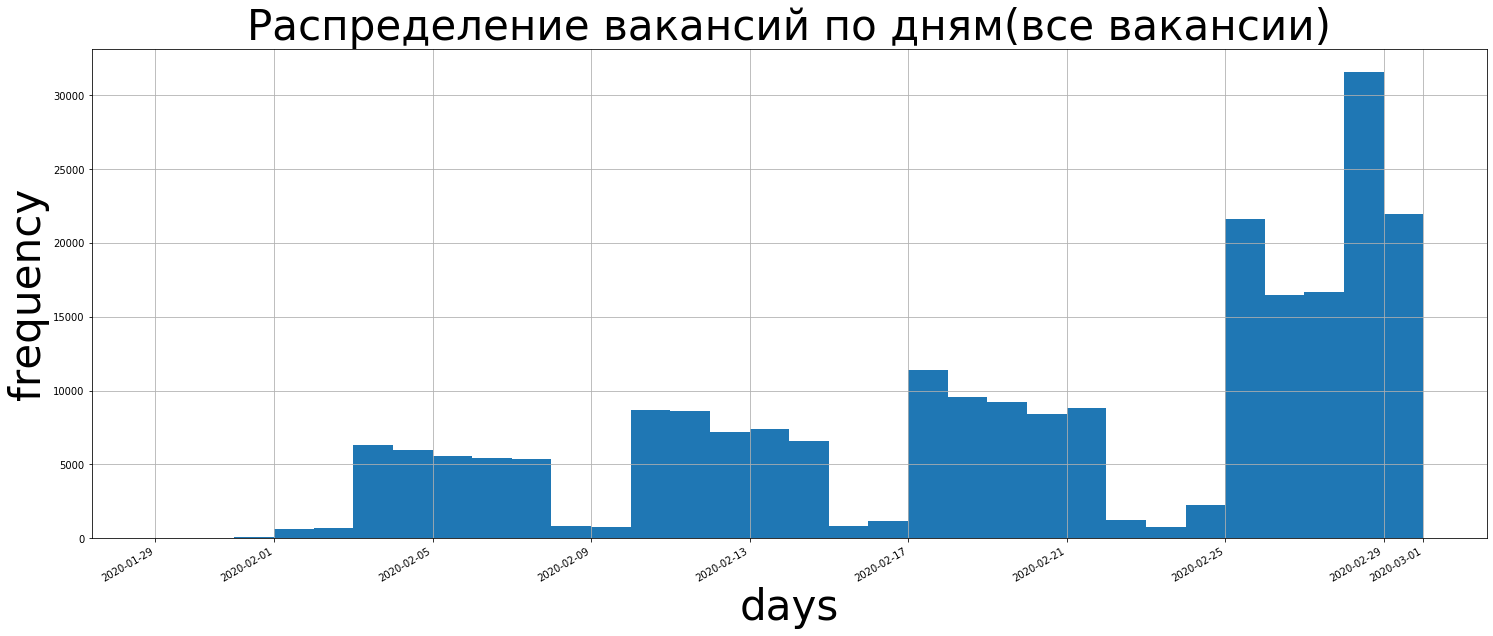

In [7]:
df['date'].hist (bins = 32)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('days', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по дням(все вакансии)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по дням(вакансии Data Science)')

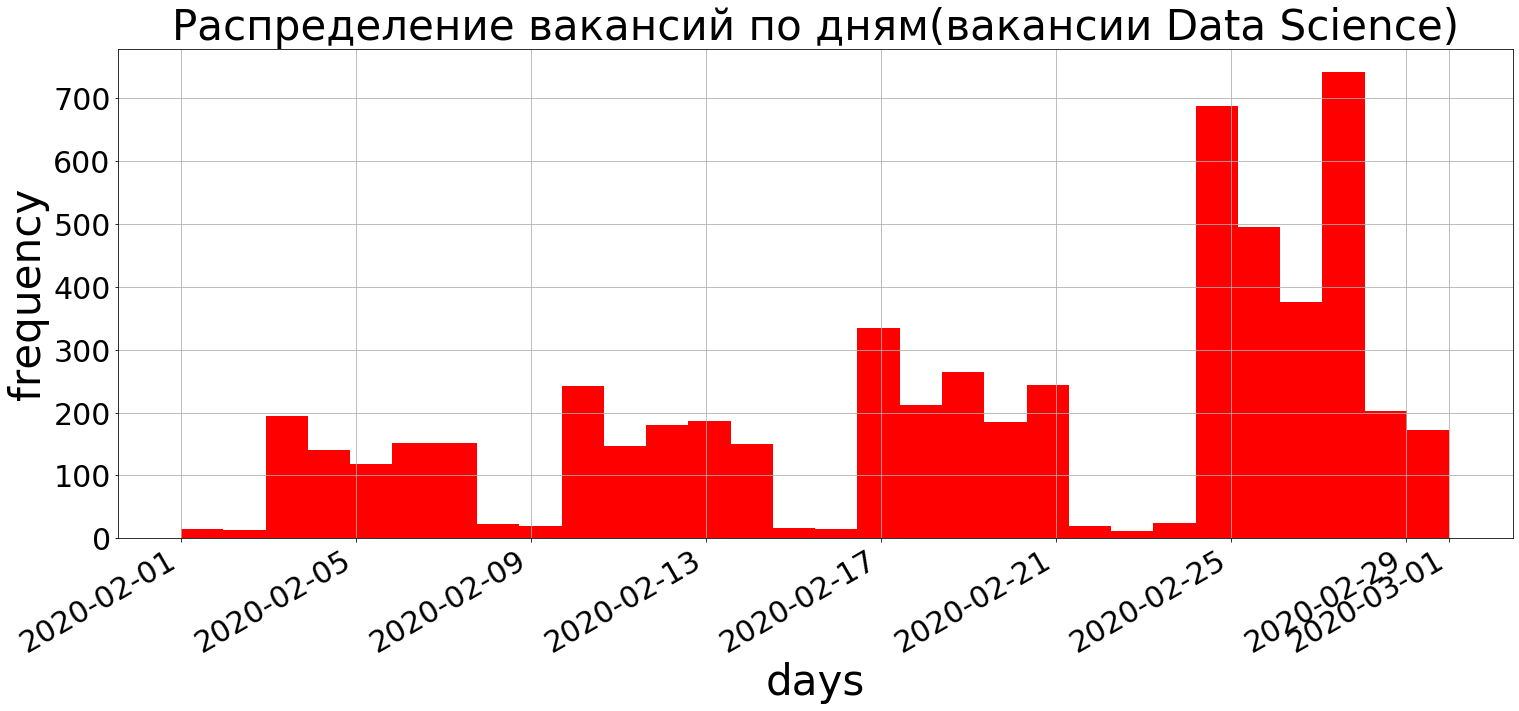

In [8]:
df_data['date'].hist (bins = 30, color = 'red')
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('days', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по дням(вакансии Data Science)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по требуемому опыту работы (все вакансии)')

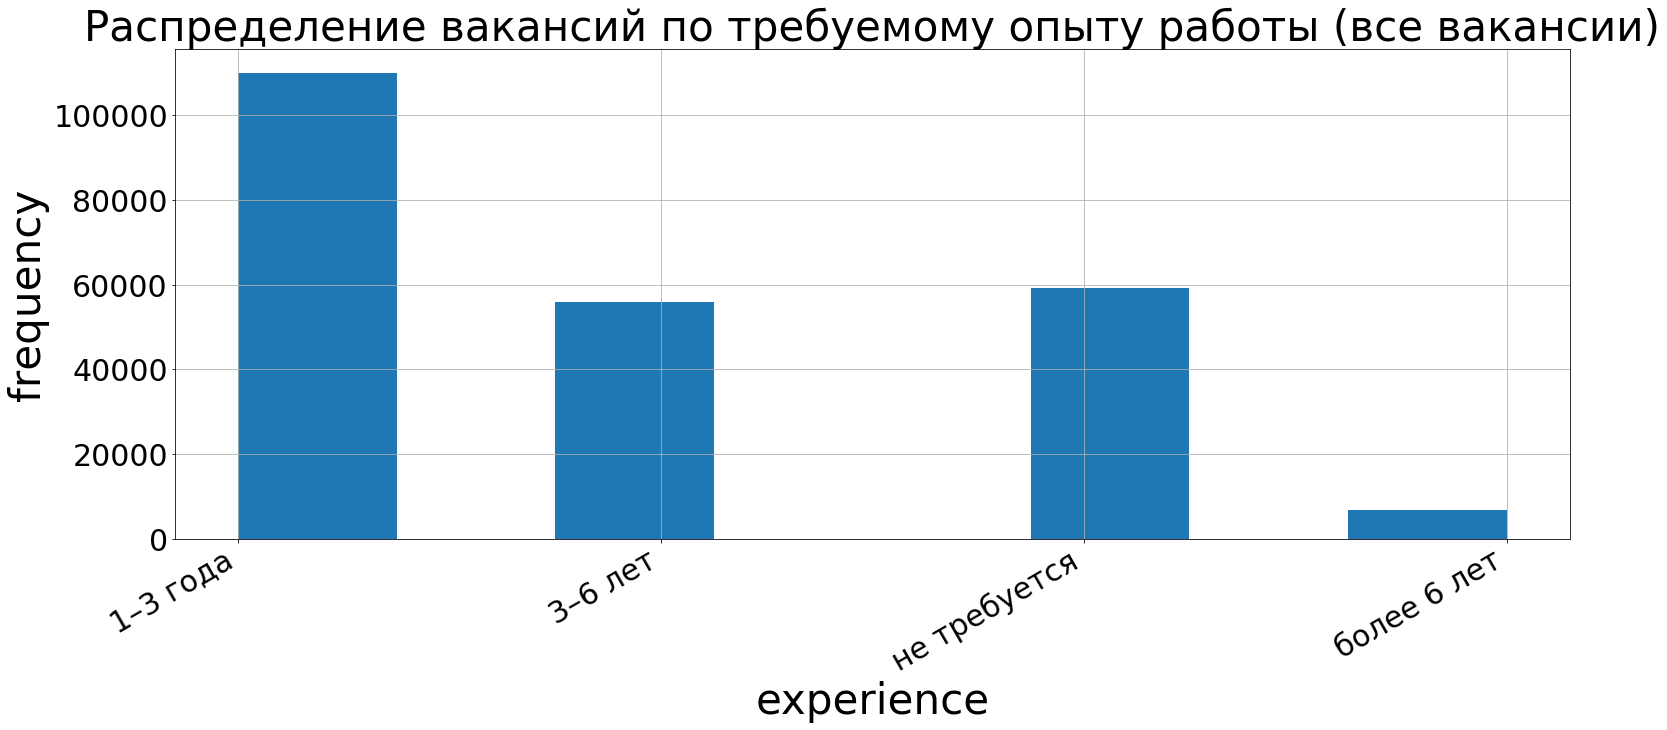

In [9]:
df['experience'].hist (bins = 8)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('experience', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по требуемому опыту работы (все вакансии)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по требуемому опыту работы (вакансии Data Science)')

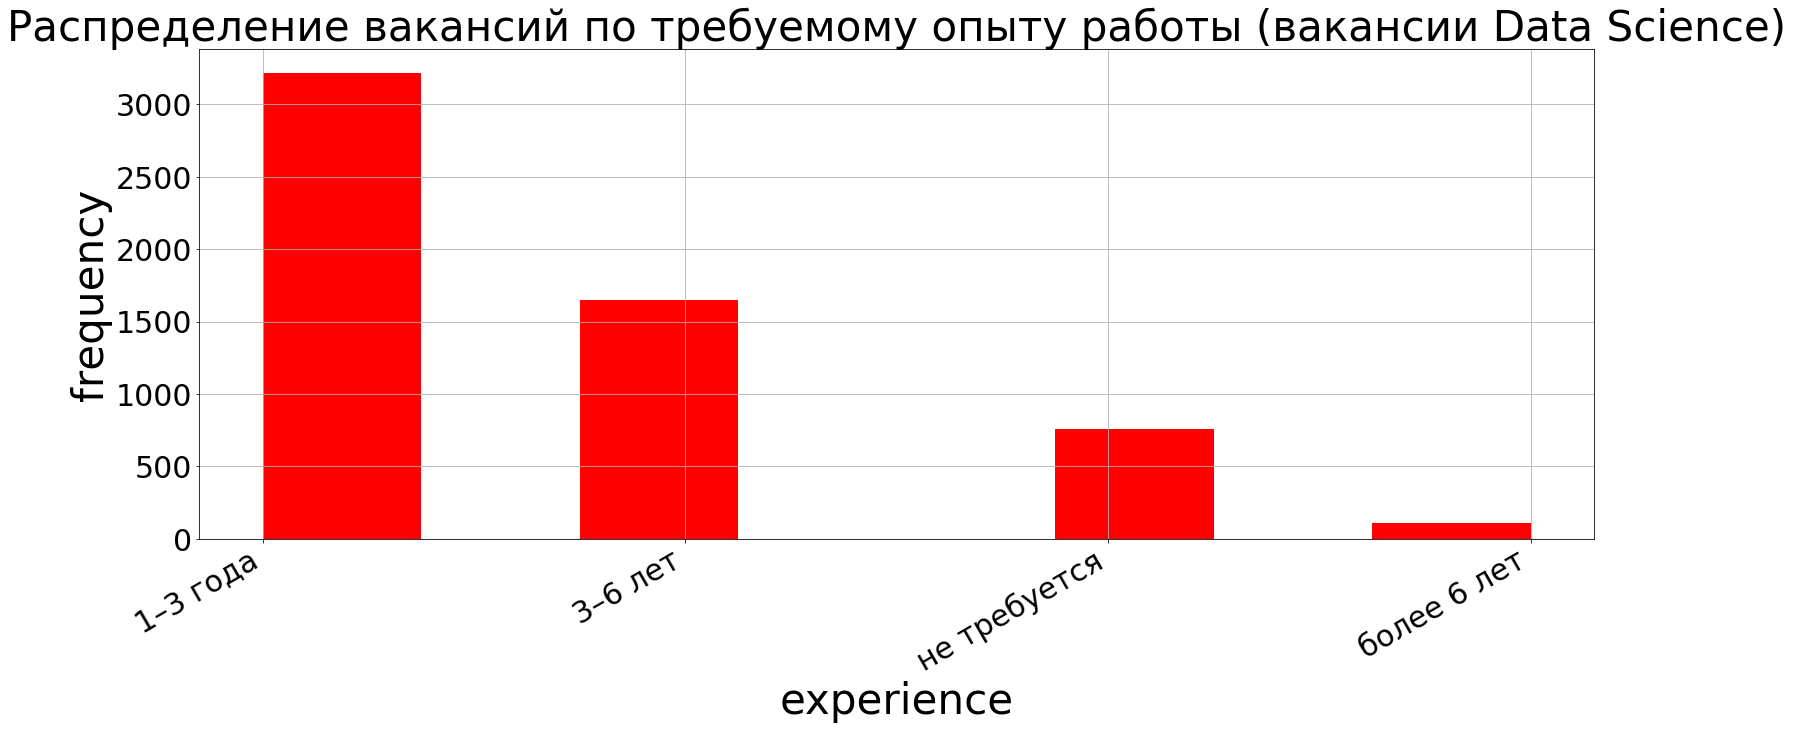

In [10]:
df_data['experience'].hist (bins = 8, color = 'red')
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('experience', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по требуемому опыту работы (вакансии Data Science)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по типу занятости (все вакансии)')

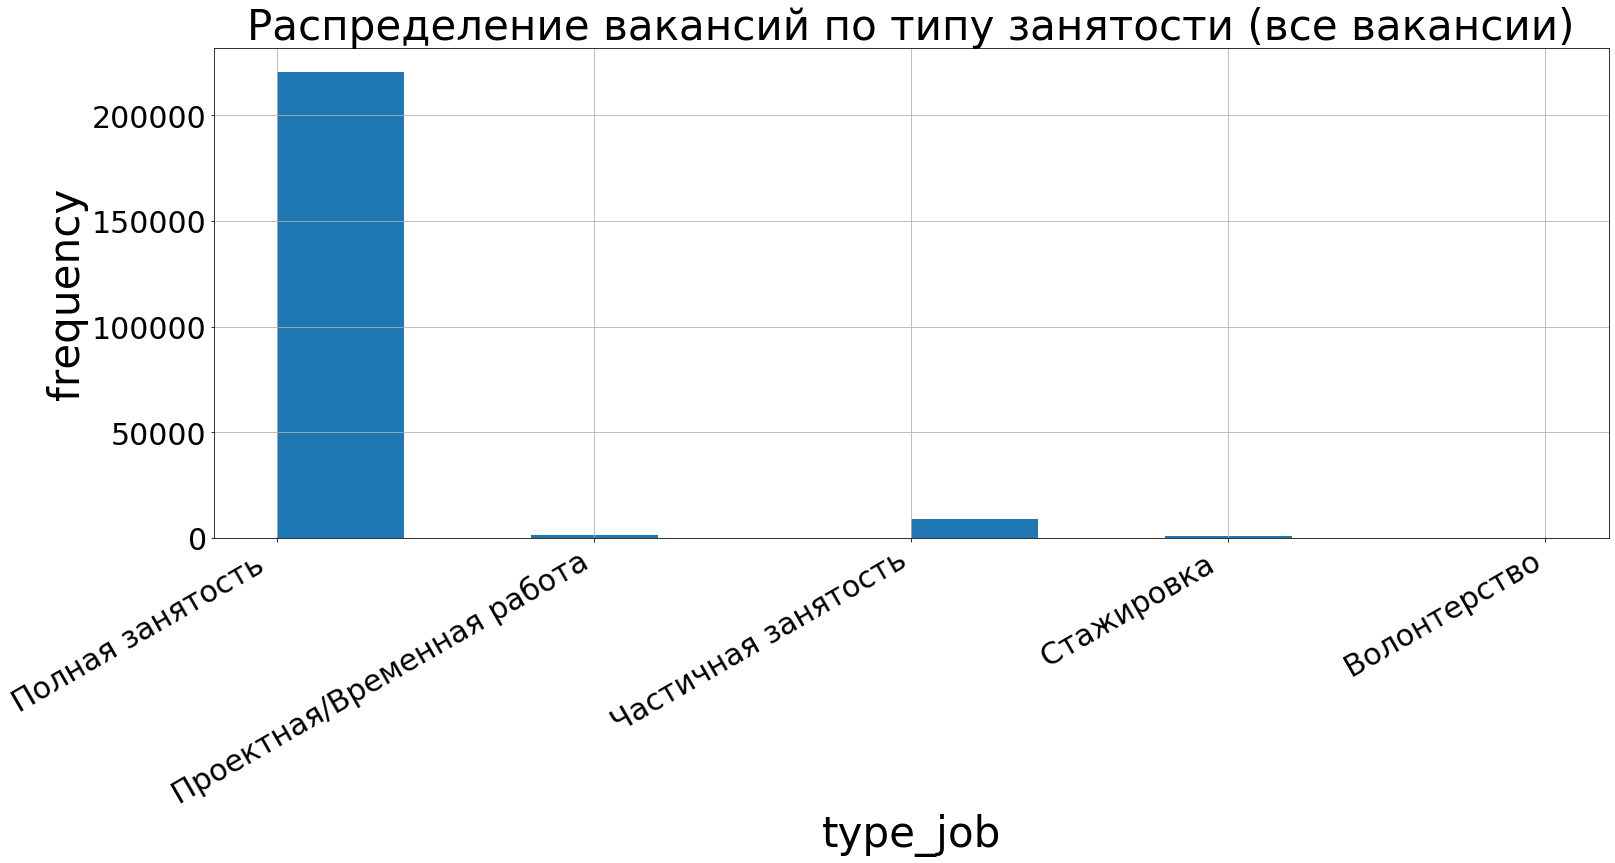

In [11]:
df['type_job'].hist (bins = 10)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('type_job', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по типу занятости (все вакансии)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по типу занятости (вакансии Data Science)')

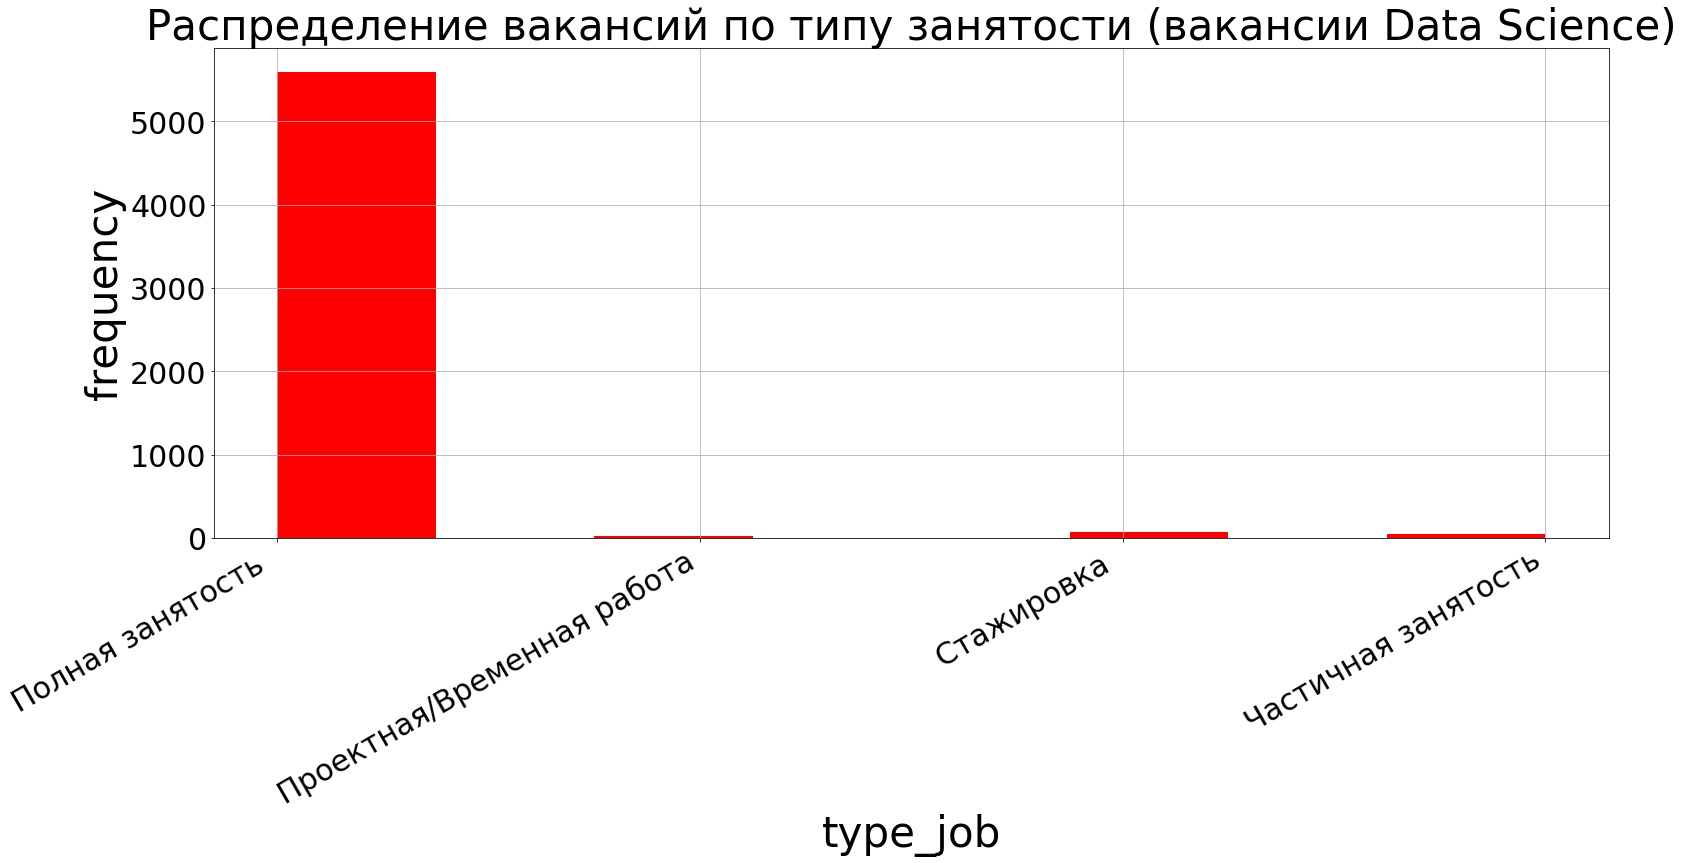

In [12]:
df_data['type_job'].hist (bins = 8, color = 'red')
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('type_job', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по типу занятости (вакансии Data Science)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по типу рабочего дня (все вакансии)')

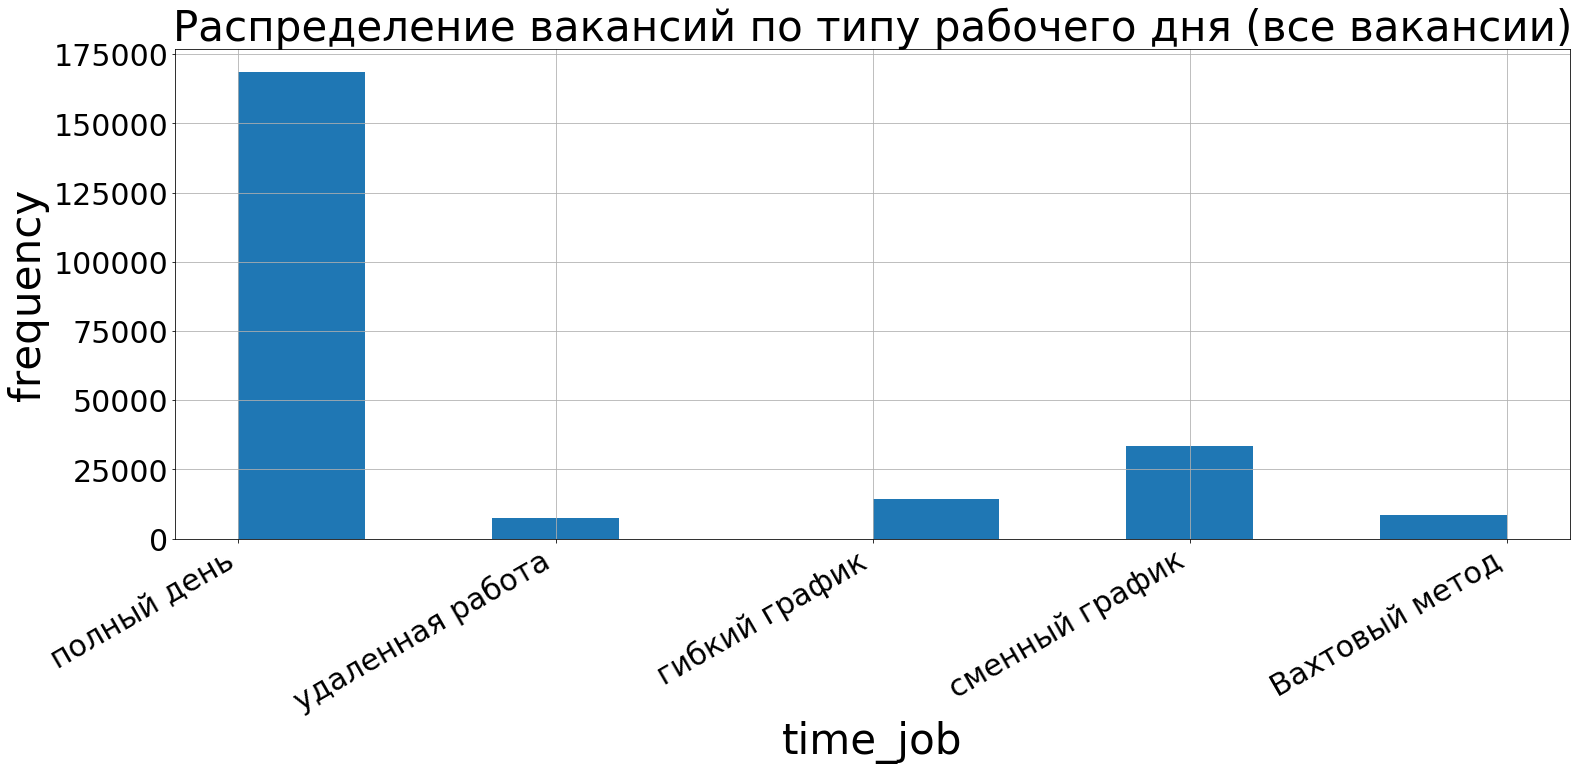

In [13]:
df['time_job'].hist (bins = 10)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('time_job', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по типу рабочего дня (все вакансии)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по типу рабочего дня (вакансии Data Science)')

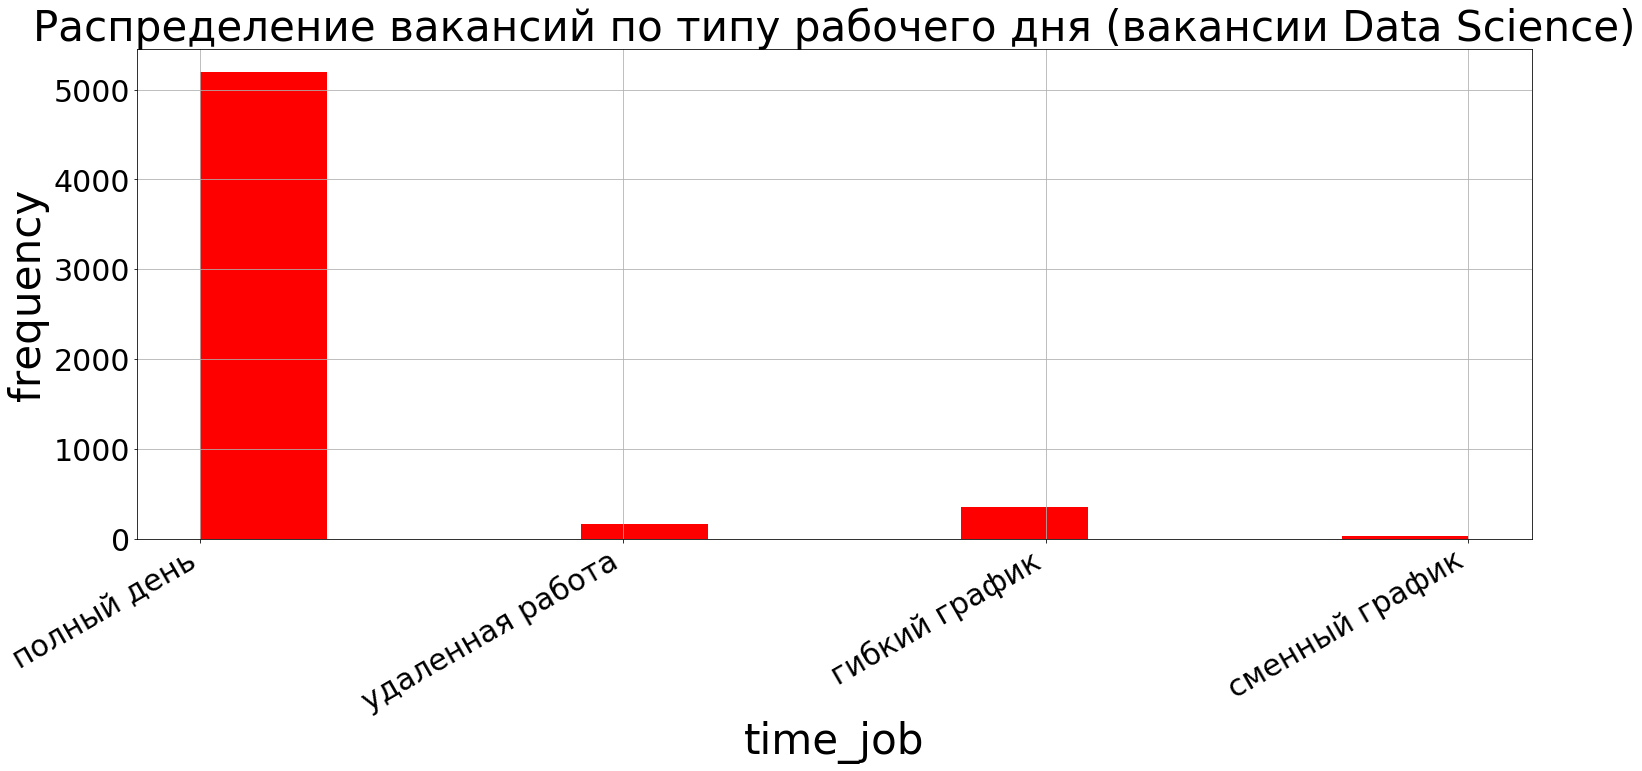

In [14]:
df_data['time_job'].hist (bins = 10, color = 'red')
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('time_job', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по типу рабочего дня (вакансии Data Science)', fontsize=42)

## Считаем зарплату

Text(0.5, 1.0, 'Распределение вакансий по нижнему порогу зар.платы (все вакансии)')

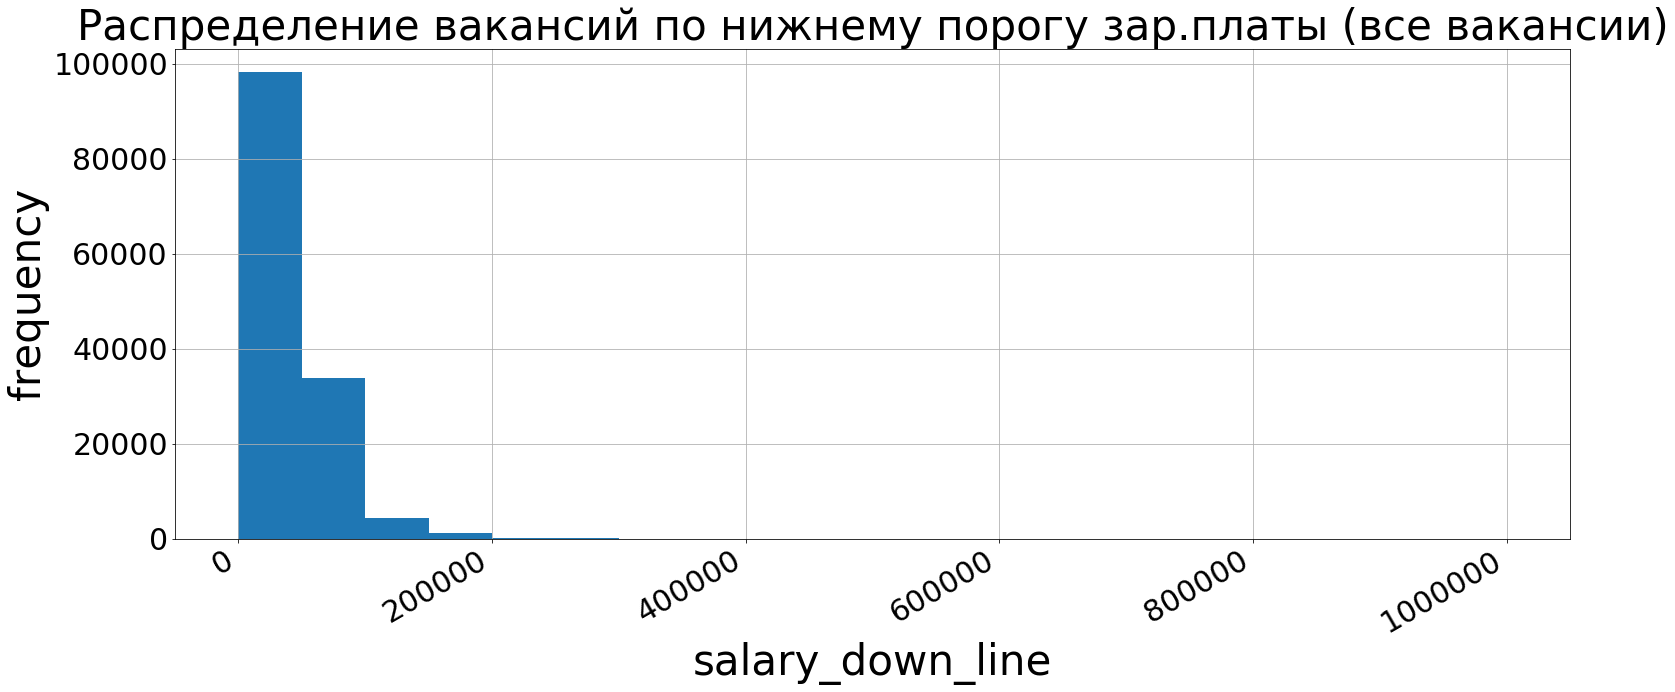

In [15]:
df['salary_down'].hist (bins = 20)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('salary_down_line', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по нижнему порогу зар.платы (все вакансии)', fontsize=42)

Text(0.5, 1.0, 'Распределение вакансий по нижнему порогу зар.платы (вакансии Data Science)')

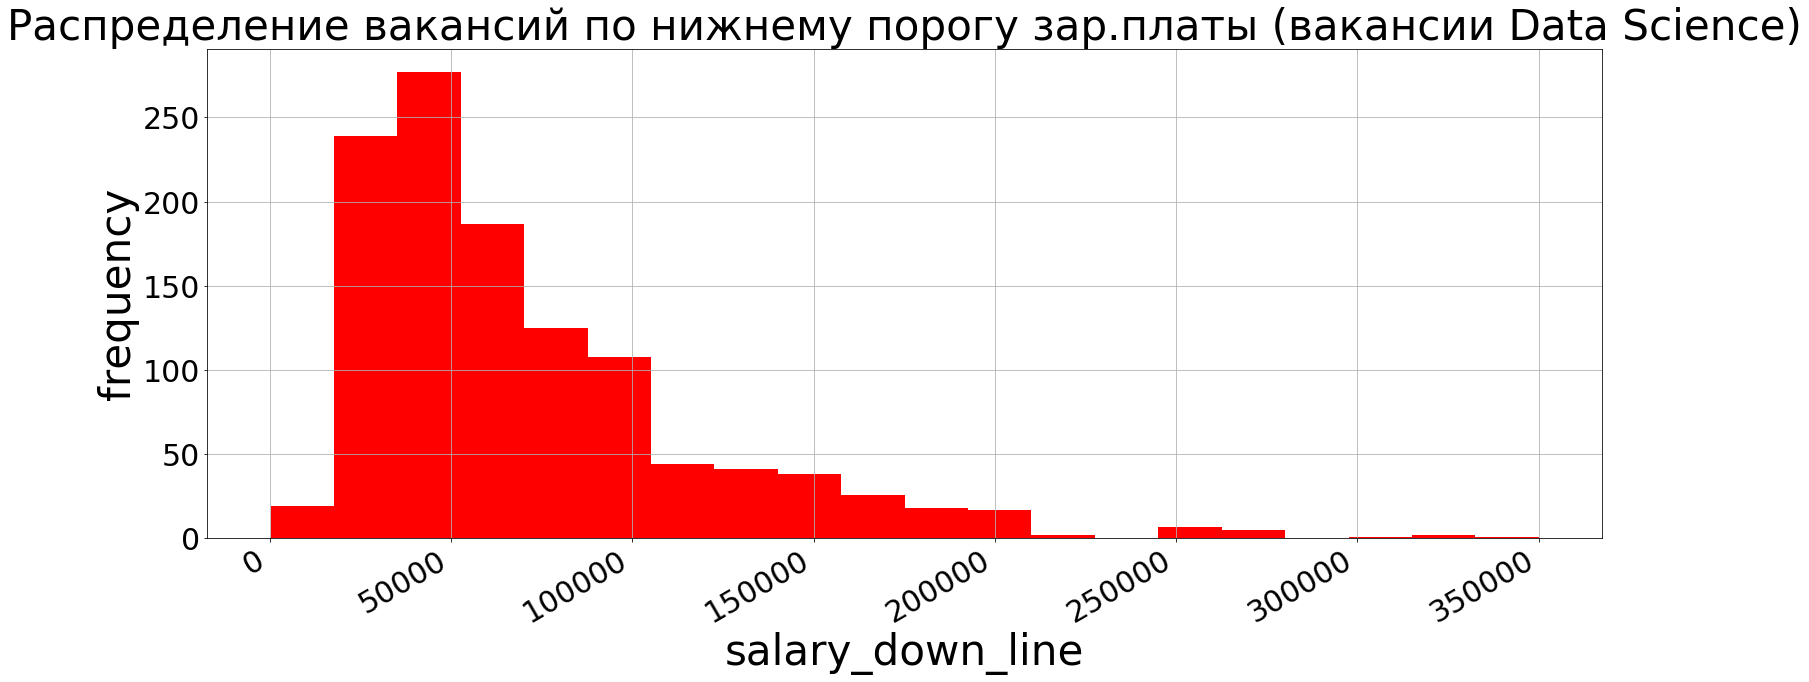

In [16]:
df_data['salary_down'].hist (bins = 20, color = 'red')
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.xlabel('salary_down_line', fontsize=42)
plt.ylabel('frequency', fontsize=42)
fig=plt.gcf()
fig.set_size_inches(25,10)
fig.autofmt_xdate()
plt.title ('Распределение вакансий по нижнему порогу зар.платы (вакансии Data Science)', fontsize=42)

In [45]:
df_rur = df[df['salary_currency'] == 'RUR']
df_rur.head()

,title,flag,experience,type_job,time_job,company_name,skills,date,where,salary_down,salary_up,salary_currency,type salary,vacansy_url,description
1,Data scientist/Портфельный аналитик,data,1–3 года,Полная занятость,полный день,"ООО, ,Поток.Диджитал","Python,Data Mining,SQL,Моделирование,Портфельн...",2020-02-28,Москве,130000.0,NaN,RUR,на руки,https://hh.ru/vacancy/35984434,NaN
4,Аналитик,data,1–3 года,Полная занятость,полный день,EASTEX,"VBA,MS Access,MS SQL Server,ABC-анализ,Статист...",2020-02-29,Москве,100000.0,NaN,RUR,на руки,https://hh.ru/vacancy/35855160,
9,Data Scientist (NLP),data,1–3 года,Полная занятость,полный день,Платформа ОФД,NoValue,2020-02-28,Москве,NaN,250000.0,RUR,на руки,https://hh.ru/vacancy/33811532,","
10,Junior Machine Learning Engineer,data,1–3 года,Полная занятость,полный день,"ООО, ,Claire&Clarté","Английский — C1 — Продвинутый,Python,Математич...",2020-02-28,Москве,NaN,140000.0,RUR,до вычета налогов,https://hh.ru/vacancy/36068146,Компания Claire&Clarté приглашает начинающего ...
11,Computer Vision / Data scientist CV,data,1–3 года,Полная занятость,полный день,"ООО, ,АлгоМост","Tensorflow,Keras,PyTorch,Computer Vision,Python",2020-02-28,Москве,100000.0,200000.0,RUR,на руки,https://hh.ru/vacancy/35987551,Компания была создана в 2012 году и является р...


In [73]:
print(df_rur['salary_up'].count())
print(df_rur['salary_up'].mean())
print(df_rur['salary_up'].std())
print(df_rur['salary_up'].min())
print(df_rur['salary_up'].max())
df_rur.describe()

83495
74044.04514042757
79418.38014722912
110.0
3000000.0


,salary_down,salary_up
count,137712.000000,8.349500e+04
mean,48952.768161,7.404405e+04
std,33072.893965,7.941838e+04
min,35.000000,1.100000e+02
25%,30000.000000,3.800000e+04
50%,40000.000000,5.500000e+04
75%,60000.000000,9.000000e+04
max,1000000.000000,3.000000e+06


In [59]:
df_data_rur = df_rur[df_rur['flag'] == 'data']
df_data_rur.describe()

,salary_down,salary_up
count,1145.000000,716.000000
mean,73131.449782,97291.329609
std,48635.258912,71793.313676
min,200.000000,250.000000
25%,40000.000000,50000.000000
50%,60000.000000,80000.000000
75%,90000.000000,120000.000000
max,350000.000000,1000000.000000


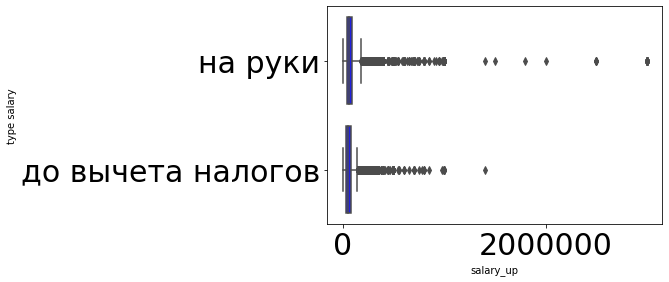

In [66]:
sns.boxplot(y='type salary', x ='salary_up', data = df_rur, color = 'blue')

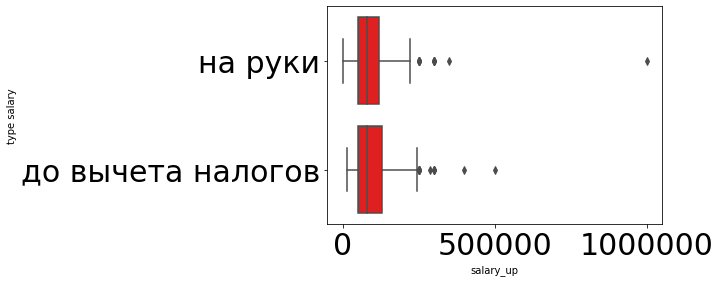

In [67]:
sns.boxplot(y='type salary', x ='salary_up', data = df_data_rur, color = 'red')

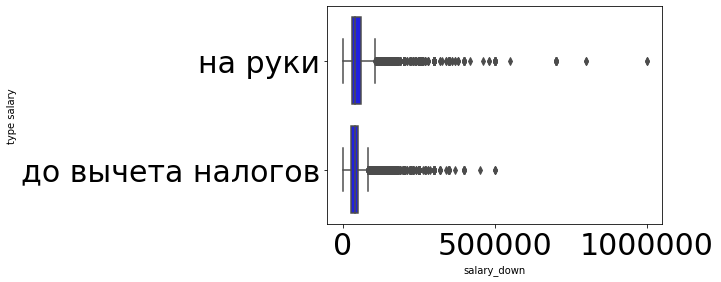

In [58]:
sns.boxplot(y='type salary', x ='salary_down', data = df_rur, color = 'blue')

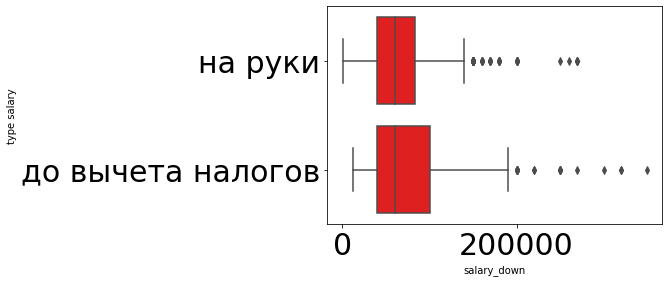

In [57]:
sns.boxplot(y='type salary', x ='salary_down', data = df_data_rur, color = 'red')

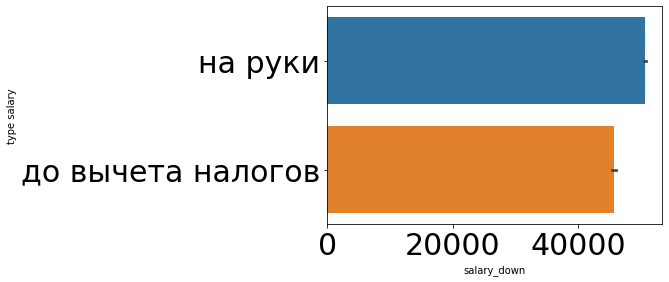

In [35]:
sns.barplot(x= 'salary_down', y= 'type salary', data = df_rur)

<BarContainer object of 200 artists>

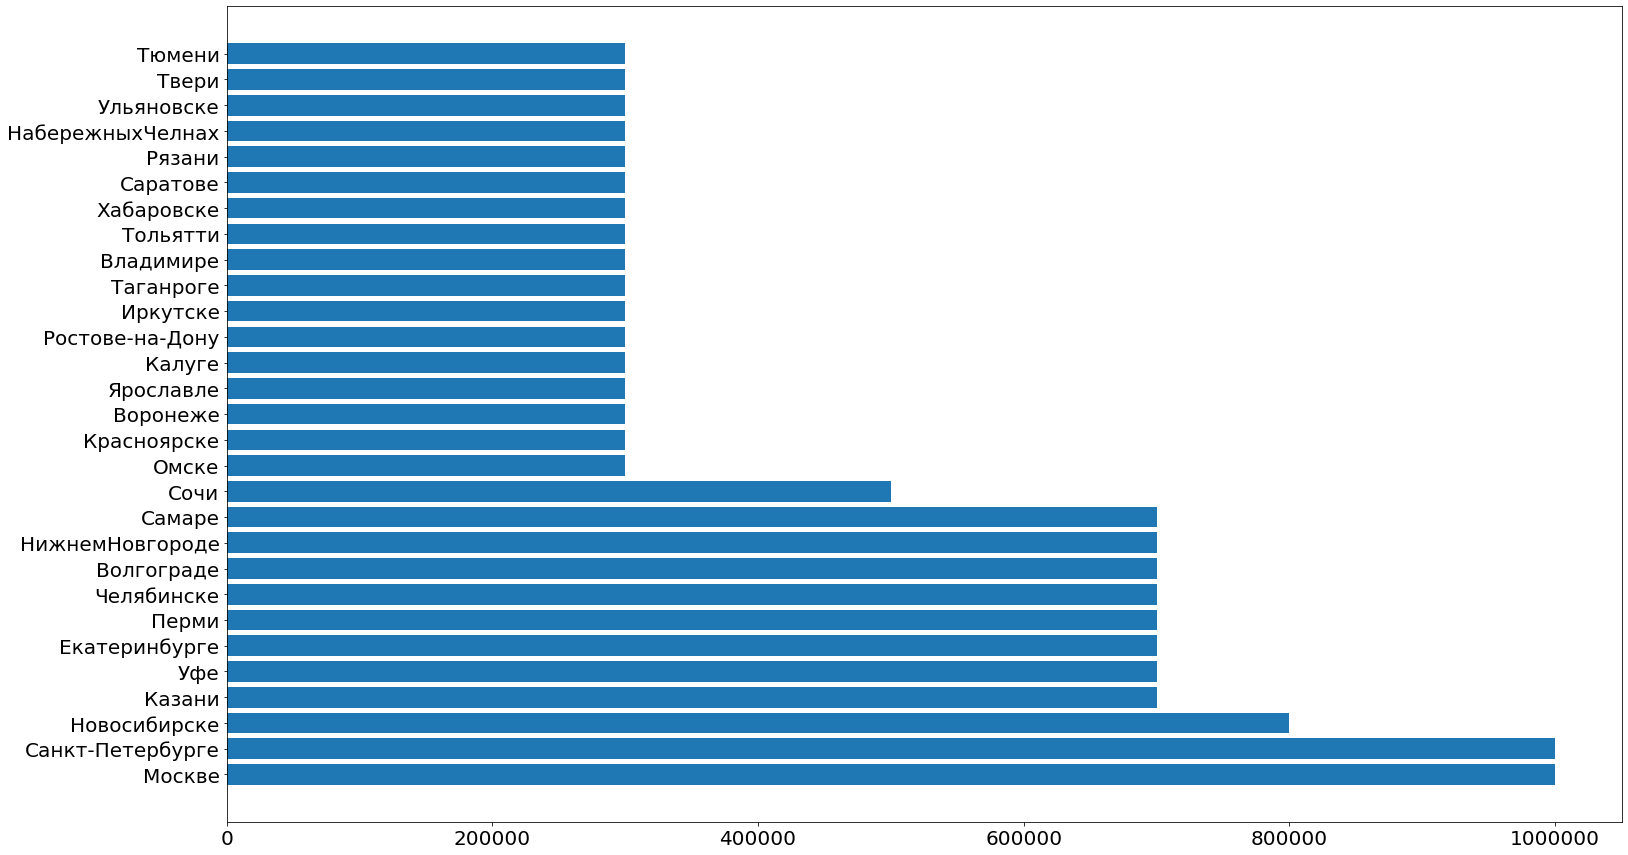

In [189]:
rur_barh = df_rur.sort_values('salary_down',ascending = False).head (200)
rur_barh_data = df_data_rur.sort_values('salary_down',ascending = False).head (200)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.barh(rur_barh['where'], rur_barh['salary_down'])

Text(0.5, 1.0, 'Распределение самых высоких зарплат по городам (вакансии Data Science)')

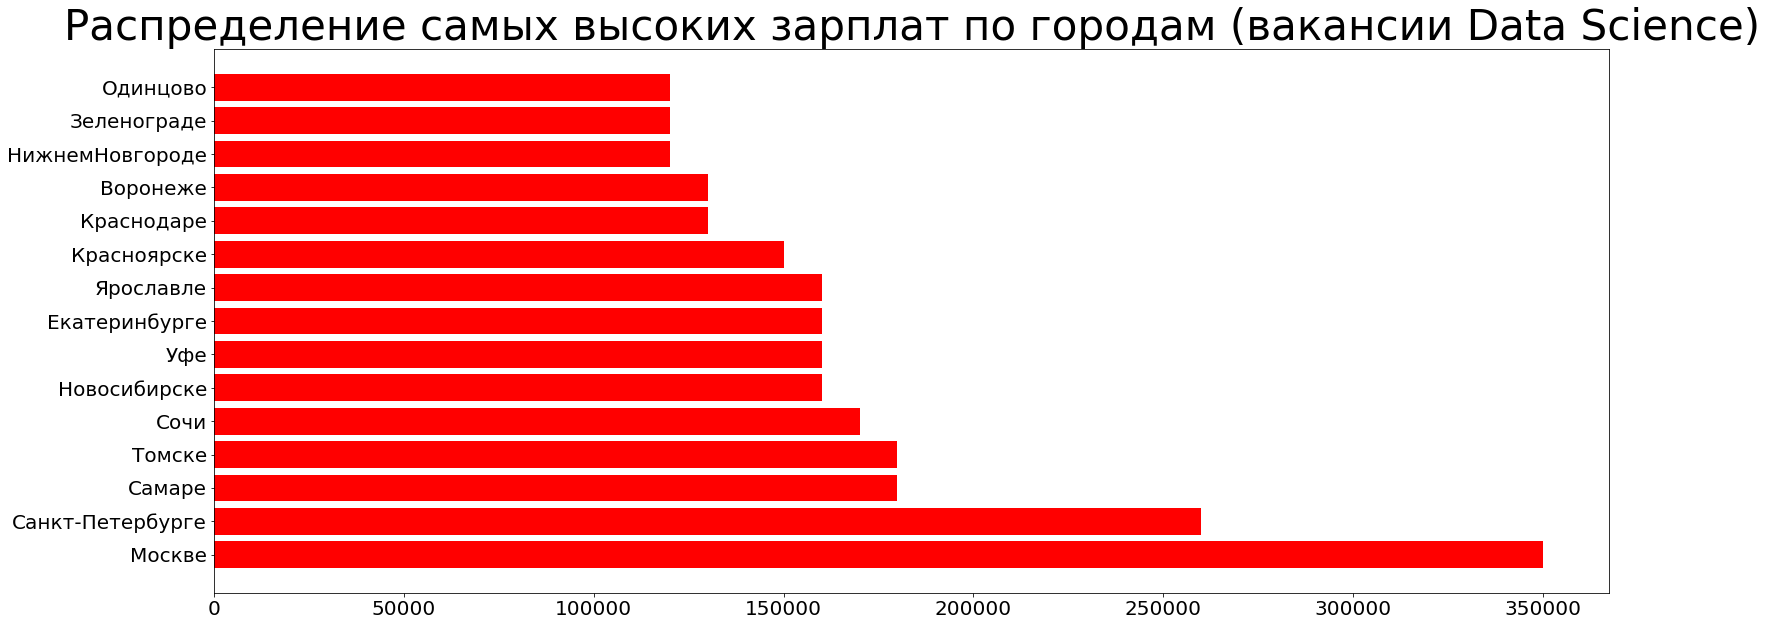

In [143]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
fig=plt.gcf()
fig.set_size_inches(25,10)
plt.barh(rur_barh_data['where'], rur_barh_data['salary_down'], color = 'red')
plt.title ('Распределение самых высоких зарплат по городам (вакансии Data Science)', fontsize=42)

In [146]:
df_groupped = df_rur.groupby ('where').agg (('mean', 'median'))
df_groupped = df_groupped ['salary_down'].sort_values('median',ascending = False)
df_groupped['median'].head(60)

where
Дубне                           140000.0
Одинцово                        120000.0
Подольске(Московскаяобласть)     80000.0
Нижневартовске                   70000.0
Магнитогорске                    70000.0
Симферополе                      57000.0
Южно-Сахалинске                  52000.0
Кургане                          50000.0
Сочи                             50000.0
Владивостоке                     50000.0
Пензе                            50000.0
Москве                           50000.0
Королеве                         45000.0
Солнечногорске                   45000.0
Зеленограде                      45000.0
Химках                           45000.0
Хабаровске                       42000.0
Санкт-Петербурге                 42000.0
Иркутске                         40000.0
Новосибирске                     40000.0
Тюмени                           40000.0
Екатеринбурге                    40000.0
Лобне                            40000.0
Мурманске                        40000.0
Красногорс

In [159]:
df_groupped_data = df_data_rur.groupby ('where').agg (('count', 'median'))
df_groupped_data = df_groupped_data ['salary_down'].sort_values('median',ascending = False)
df_groupped_data.head(30)

,count,median
where,,
Сочи,3,130000.0
Одинцово,2,120000.0
Москве,513,80000.0
Зеленограде,8,75750.0
Череповце,1,60000.0
Владивостоке,27,60000.0
Челябинске,9,60000.0
Магнитогорске,1,60000.0
Санкт-Петербурге,136,60000.0


## Считаем скилы

In [213]:
from itertools import groupby
skill_list = []
def skilllist(Column_Dataset):
    #skill_list = []
    for skill in Column_Dataset:

        skill = str(skill).split(",")
        skill.sort()

        skill = [el for el, _ in groupby(skill)]
        skill_list.append(skill)
    return skill_list

In [20]:
skilllist(df_data['skills'])

[['Data Mining',
  'Python',
  'SQL',
  'data science',
  'hadoop',
  'hive',
  'numpy',
  'scipy',
  'statsmodel',
  'Анализ данных',
  'Математическая статистика'],
 ['Data Mining',
  'Python',
  'SQL',
  'Анализ данных',
  'Математическая статистика',
  'Математическое моделирование',
  'Моделирование',
  'Портфельные риски'],
 ['Business intelligence',
  'PostgreSQL',
  'Python',
  'R',
  'SQL',
  'WEB аналитика',
  'data science',
  'machine learning',
  'Веб-аналитика',
  'Конкурентная аналитика',
  'Математическое моделирование',
  'Финансовое моделирование'],
 ['artificial intellegence'],
 ['ABC-анализ',
  'MS Access',
  'MS SQL Server',
  'VBA',
  'Анализ бизнес показателей',
  'Аналитика продаж',
  'Математический анализ',
  'Статистический анализ'],
 ['Java', 'Linux', 'MySQL', 'PHP', 'SQL'],
 ['Python',
  'SQL',
  'Аналитические исследования',
  'Английский язык',
  'Бизнес-анализ'],
 ['Big Data', 'Data Analysis', 'Python'],
 ['MS Access',
  'MS Excel',
  'MS PowerPoint',
  

In [218]:
def listmerge(lstlst):
    all=[]
    for lst in lstlst:
      all.extend(lst)
    return all

In [216]:
counter = listmerge(skill_list)
counter1 = []
for i in counter:
    i = i.lstrip()
    counter1.append(i)
counter1

['Data Analysis',
 'Data Mining',
 'LightGBM',
 'Machine Learning',
 'NumPy',
 'Python',
 'SQL',
 'XGBoost',
 'pandas',
 'sklearn',
 'Analytical skills',
 'Booking Hotels',
 'Customer Relationship Management',
 'Customer Service',
 'Customer Support',
 'Data Analysis',
 'E-Commerce',
 'MS Office',
 'Opera',
 'SQL',
 'Shipping',
 'Kaggle',
 'Python',
 'R',
 'SQL',
 'Tableau',
 'Алгоритмическая торговля',
 'Валютный рынок',
 'Инвестиционный консалтинг',
 'Количественное инвестрирование',
 'Машинное обучение',
 'Риск-менеджмент',
 'Управление рисками',
 'Фондовый рынок',
 'ADO.NET',
 'Analytical skills',
 'C#',
 'C++',
 'C++17',
 'Git',
 'JSON API',
 'Java',
 'JavaScript',
 'Keras',
 'Linear Algebra',
 'Matplotlib',
 'Numpy',
 'Pandas',
 'Python',
 'STL',
 'Seaborn',
 'Sklearn',
 'XML',
 'Big Data',
 'Django Framework',
 'Machine Learning',
 'Python',
 'Анализ данных',
 'Аналитическое мышление',
 'Навыки переговоров',
 'Работа С Отчетностью',
 'Составление бизнес-плана',
 'A/B тесты',
 'B

In [23]:
import re
from collections import Counter
information = Counter(counter1)

information

Counter({'Data Mining': 226,
         'Python': 839,
         'SQL': 1306,
         'data science': 15,
         'hadoop': 18,
         'hive': 5,
         'numpy': 10,
         'scipy': 4,
         'statsmodel': 1,
         'Анализ данных': 328,
         'Математическая статистика': 141,
         'Математическое моделирование': 84,
         'Моделирование': 9,
         'Портфельные риски': 3,
         'Business intelligence': 13,
         'PostgreSQL': 108,
         'R': 57,
         'WEB аналитика': 42,
         'machine learning': 26,
         'Веб-аналитика': 58,
         'Конкурентная аналитика': 14,
         'Финансовое моделирование': 48,
         'artificial intellegence': 1,
         'ABC-анализ': 25,
         'MS Access': 234,
         'MS SQL Server': 107,
         'VBA': 133,
         'Анализ бизнес показателей': 63,
         'Аналитика продаж': 64,
         'Математический анализ': 76,
         'Статистический анализ': 205,
         'Java': 162,
         'Linux': 145,
    

In [24]:
with open('dict.txt','w') as i:
    for key,val in information.items():
        i.write('{}:{}\n'.format(key,val))

In [27]:
df_skills = pd.read_csv("dict.csv")
df_skills.head(20)

,skiils,count
0,SQL,1306
1,Python,839
2,Бизнес-анализ,591
3,MS PowerPoint,559
4,MS SQL,491
5,Английский язык,415
6,Аналитическое мышление,343
7,Анализ данных,328
8,MS Excel,327
9,Аналитические исследования,319


## Резюме


In [199]:
df_resume = pd.read_excel("resume_cleaned.xlsx")
df_resume.head()

,vacancy_name,gender,age,city,skills,experience_year,experience_month,last_job,resume_url
0,Data Scientist,Male,NaN,Москва,"SQL,Python,NumPy,pandas,Machine Learning,sklea...",5.0,9,NaN,https://hh.ru/resume/eba531c30006567ca70039ed1...
1,Data Engineer / Project Manager,Male,33.0,Москва,"Booking Hotels,Analytical skills,Data Analysis...",12.0,1,Леруа Мерлен,https://hh.ru/resume/f4fc3b2700028167ac0039ed1...
2,Управляющий активами,Male,37.0,Москва,"Python,R,SQL,Риск-менеджмент,Tableau,Управлени...",15.0,5,"Пермский государственный университет, Пермь",https://hh.ru/resume/68f5f69c00015d0ec70039ed1...
3,Junior Data science (intern),Male,20.0,Москва,"C++,Python,Sklearn,Pandas,Numpy,Keras,Git,ADO....",0.0,4,Acronis,https://hh.ru/resume/ed6cef170005e942a70039ed1...
4,Big Data аналитик/ Python developer,Male,35.0,Москва,"Составление бизнес-плана,Работа С Отчетностью,...",12.0,5,РосБизнесКонсалтинг,https://hh.ru/resume/2a751cb000019d3d910039ed1...


In [161]:
df_resume.describe()

,age,experience_year
count,2757.000000,2892.000000
mean,33.670294,11.012794
std,8.643548,7.244424
min,14.000000,0.000000
25%,27.000000,5.000000
50%,33.000000,11.000000
75%,39.000000,16.000000
max,119.000000,43.000000


Text(0, 0.5, 'frequency')

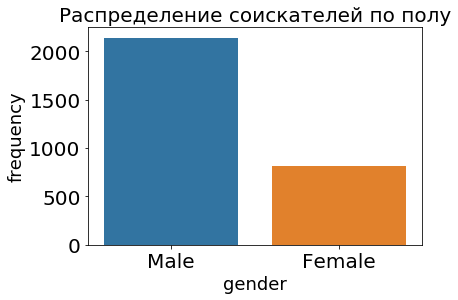

In [195]:
sns.countplot(x= 'gender', data = df_resume)
plt.title ('Распределение соискателей по полу', fontsize=20)
plt.xlabel('gender', fontsize=18)
plt.ylabel('frequency', fontsize=18)

Text(0, 0.5, 'gender')

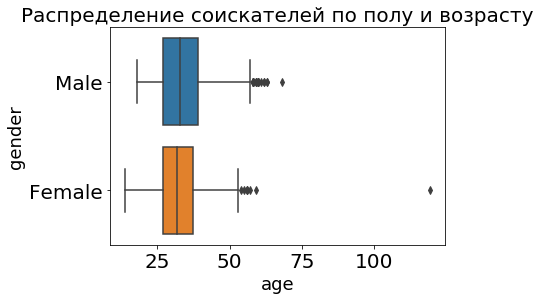

In [196]:
sns.boxplot(y = 'gender', x ='age', data = df_resume)
plt.title ('Распределение соискателей по полу и возрасту', fontsize=20)
plt.xlabel('age', fontsize=18)
plt.ylabel('gender', fontsize=18)

In [212]:
df_city = df_resume ['city'].value_counts(ascending = False)
df_city.head(20)

Москва             2607
Санкт-Петербург      67
Алматы               17
Екатеринбург         12
Нур-Султан            9
Нижний Новгород       9
Уфа                   9
Минск                 8
Новосибирск           7
Калининград           7
Челябинск             7
Самара                7
Краснодар             7
Казань                7
Germany               4
Баку                  4
USA                   4
Тюмень                4
Ростов-на-Дону        4
Хабаровск             3
Name: city, dtype: int64

In [214]:
skilllist(df_resume['skills'])

[['Data Analysis',
  'Data Mining',
  'LightGBM',
  'Machine Learning',
  'NumPy',
  'Python',
  'SQL',
  'XGBoost',
  'pandas',
  'sklearn'],
 ['Analytical skills',
  'Booking Hotels',
  'Customer Relationship Management',
  'Customer Service',
  'Customer Support',
  'Data Analysis',
  'E-Commerce',
  'MS Office',
  'Opera',
  'SQL',
  'Shipping'],
 ['Kaggle',
  'Python',
  'R',
  'SQL',
  'Tableau',
  'Алгоритмическая торговля',
  'Валютный рынок',
  'Инвестиционный консалтинг',
  'Количественное инвестрирование',
  'Машинное обучение',
  'Риск-менеджмент',
  'Управление рисками',
  'Фондовый рынок'],
 ['ADO.NET',
  'Analytical skills',
  'C#',
  'C++',
  'C++17',
  'Git',
  'JSON API',
  'Java',
  'JavaScript',
  'Keras',
  'Linear Algebra',
  'Matplotlib',
  'Numpy',
  'Pandas',
  'Python',
  'STL',
  'Seaborn',
  'Sklearn',
  'XML'],
 ['Big Data',
  'Django Framework',
  'Machine Learning',
  'Python',
  'Анализ данных',
  'Аналитическое мышление',
  'Навыки переговоров',
  'Рабо

In [217]:
counter = listmerge(skill_list)
counter1 = []
for i in counter:
    i = i.lstrip()
    counter1.append(i)
counter1

['Data Analysis',
 'Data Mining',
 'LightGBM',
 'Machine Learning',
 'NumPy',
 'Python',
 'SQL',
 'XGBoost',
 'pandas',
 'sklearn',
 'Analytical skills',
 'Booking Hotels',
 'Customer Relationship Management',
 'Customer Service',
 'Customer Support',
 'Data Analysis',
 'E-Commerce',
 'MS Office',
 'Opera',
 'SQL',
 'Shipping',
 'Kaggle',
 'Python',
 'R',
 'SQL',
 'Tableau',
 'Алгоритмическая торговля',
 'Валютный рынок',
 'Инвестиционный консалтинг',
 'Количественное инвестрирование',
 'Машинное обучение',
 'Риск-менеджмент',
 'Управление рисками',
 'Фондовый рынок',
 'ADO.NET',
 'Analytical skills',
 'C#',
 'C++',
 'C++17',
 'Git',
 'JSON API',
 'Java',
 'JavaScript',
 'Keras',
 'Linear Algebra',
 'Matplotlib',
 'Numpy',
 'Pandas',
 'Python',
 'STL',
 'Seaborn',
 'Sklearn',
 'XML',
 'Big Data',
 'Django Framework',
 'Machine Learning',
 'Python',
 'Анализ данных',
 'Аналитическое мышление',
 'Навыки переговоров',
 'Работа С Отчетностью',
 'Составление бизнес-плана',
 'A/B тесты',
 'B

In [219]:
import re
from collections import Counter
information = Counter(counter1)

information

Counter({'Data Analysis': 305,
         'Data Mining': 83,
         'LightGBM': 5,
         'Machine Learning': 56,
         'NumPy': 13,
         'Python': 472,
         'SQL': 400,
         'XGBoost': 4,
         'pandas': 31,
         'sklearn': 17,
         'Analytical skills': 278,
         'Booking Hotels': 1,
         'Customer Relationship Management': 68,
         'Customer Service': 67,
         'Customer Support': 13,
         'E-Commerce': 50,
         'MS Office': 334,
         'Opera': 14,
         'Shipping': 3,
         'Kaggle': 4,
         'R': 54,
         'Tableau': 43,
         'Алгоритмическая торговля': 1,
         'Валютный рынок': 1,
         'Инвестиционный консалтинг': 7,
         'Количественное инвестрирование': 1,
         'Машинное обучение': 28,
         'Риск-менеджмент': 9,
         'Управление рисками': 41,
         'Фондовый рынок': 7,
         'ADO.NET': 5,
         'C#': 89,
         'C++': 93,
         'C++17': 1,
         'Git': 262,
         'JS

In [220]:
with open('dict_resume.txt','w') as i:
    for key,val in information.items():
        i.write('{}:{}\n'.format(key,val))